In [1]:
import pandas as pd
import numpy as np
from sklearn.utils import resample
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
test_df = pd.read_parquet('/kaggle/input/ozon-features/test_updated.parquet')
test_df['for_sample'] = test_df['category_level_2'] + test_df['category_level_3']

In [3]:
train_df = pd.read_parquet('/kaggle/input/ozon-features/train_updated.parquet')
train_df['for_sample'] = train_df['category_level_2'] + train_df['category_level_3']

In [4]:
train_df = train_df[
    ~train_df['category_level_2'].isin(
        ['Антиквариат и коллекционирование', 'Ювелирные изделия', 'Автомототехника', 'Фермерское хозяйство']
    )
]

In [5]:
values_to_remove = [
    "Мебель(Don't use) Пуфики и банкетки",
    "Мебель(Don't use) Комплектующие для мебели"
] # они представлены в тесте, но отсутствуют в трейне

test_df = test_df[~test_df['for_sample'].isin(values_to_remove)]

In [6]:
dist_test_df = test_df['for_sample'].value_counts(normalize=True)
dist_train_df = train_df['for_sample'].value_counts(normalize=True)

In [7]:
weights = dist_test_df / dist_train_df

In [8]:
def weighted_sample(df, weights, n):
    df_sampled = df.sample(n=n, replace=True, weights=df['for_sample'].map(weights), random_state=42)
    return df_sampled

sampled_df = weighted_sample(train_df, weights, 50000)

In [9]:
test_counts = test_df['category_level_2'].value_counts()
sampled_counts = sampled_df['category_level_2'].value_counts()

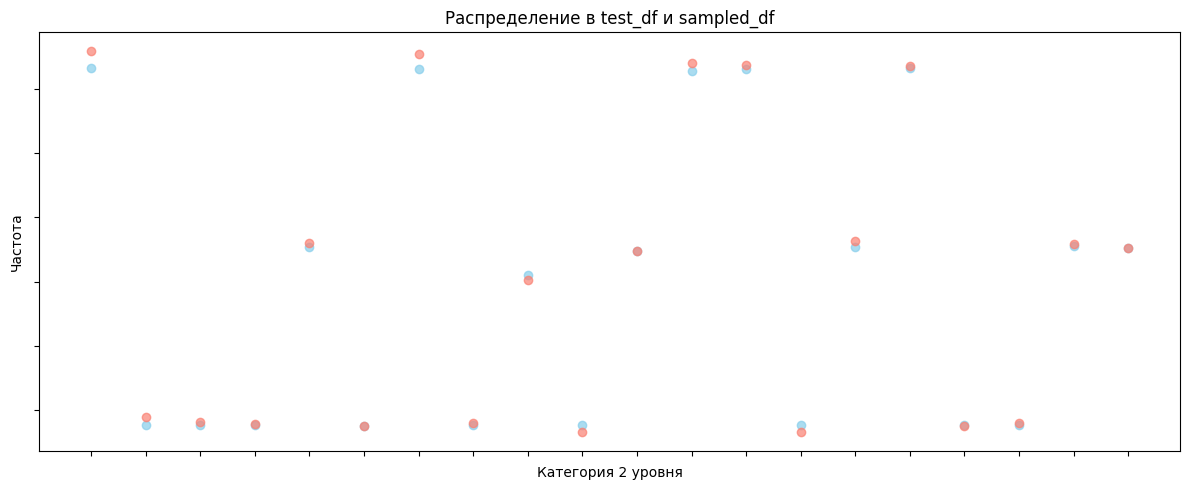

In [10]:
counts_df = pd.DataFrame({'test_df': test_counts, 'sampled_df': sampled_counts}).fillna(0)

fig, ax = plt.subplots(figsize=(12, 5))

ax.scatter(counts_df.index, counts_df['test_df'], color='skyblue', label='test_df', alpha=0.7)
ax.scatter(counts_df.index, counts_df['sampled_df'], color='salmon', label='sampled_df', alpha=0.7)

ax.set_title('Распределение в test_df и sampled_df')
ax.set_xlabel('Категория 2 уровня')
ax.set_ylabel('Частота')
ax.set_xticklabels([])
ax.set_yticklabels([])

plt.tight_layout()
plt.show()

In [11]:
test_counts = test_df['category_level_3'].value_counts()
sampled_counts = sampled_df['category_level_3'].value_counts()

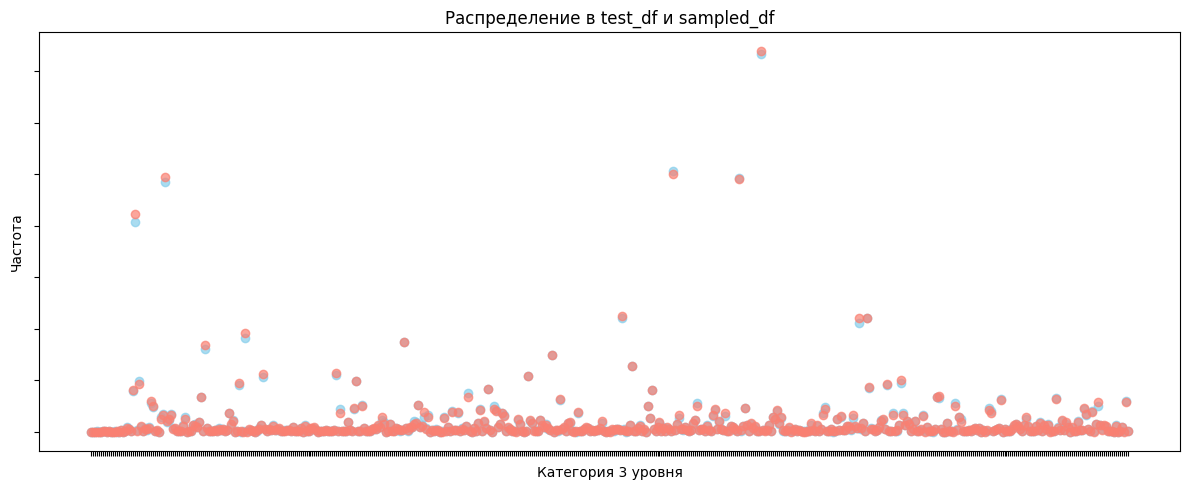

In [12]:
counts_df = pd.DataFrame({'test_df': test_counts, 'sampled_df': sampled_counts}).fillna(0)

fig, ax = plt.subplots(figsize=(12, 5))

ax.scatter(counts_df.index, counts_df['test_df'], color='skyblue', label='test_df', alpha=0.7)
ax.scatter(counts_df.index, counts_df['sampled_df'], color='salmon', label='sampled_df', alpha=0.7)

ax.set_title('Распределение в test_df и sampled_df')
ax.set_xlabel('Категория 3 уровня')
ax.set_ylabel('Частота')
ax.set_xticklabels([])
ax.set_yticklabels([])

plt.tight_layout()
plt.show()

In [13]:
pd.DataFrame(sampled_df.index).to_csv('index.csv', index=False)